<a href="https://colab.research.google.com/github/Vikas8719/My-first-model/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
  df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
  df.shape

(891, 12)

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
numeric_columns=['Survived','Pclass','SibSp','Parch','Fare']

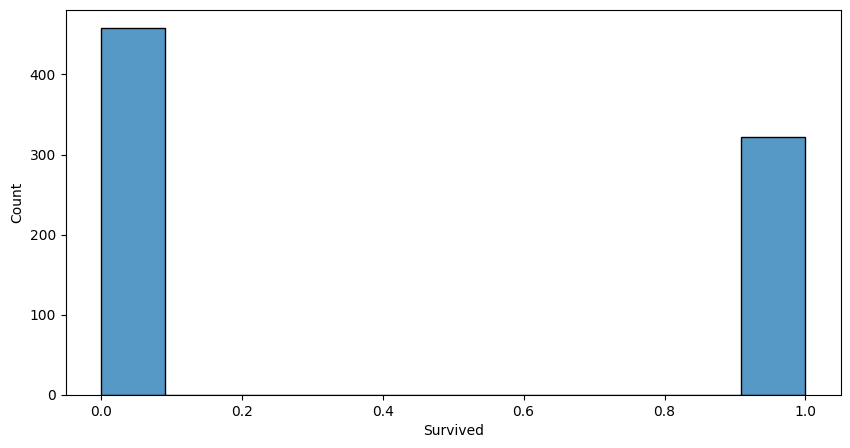

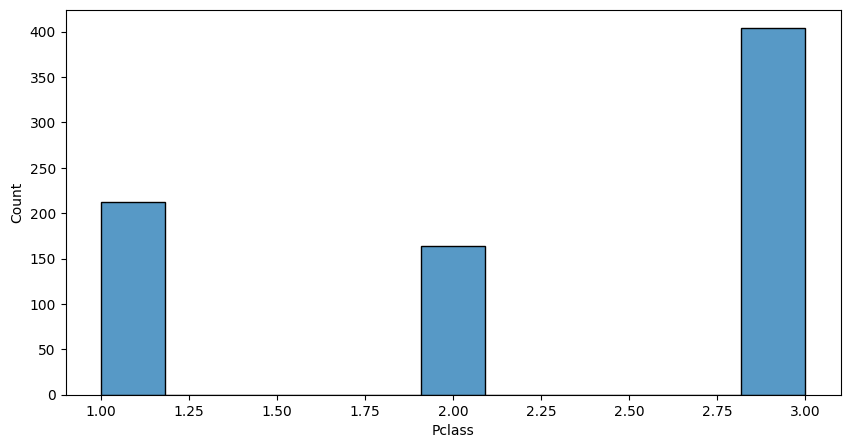

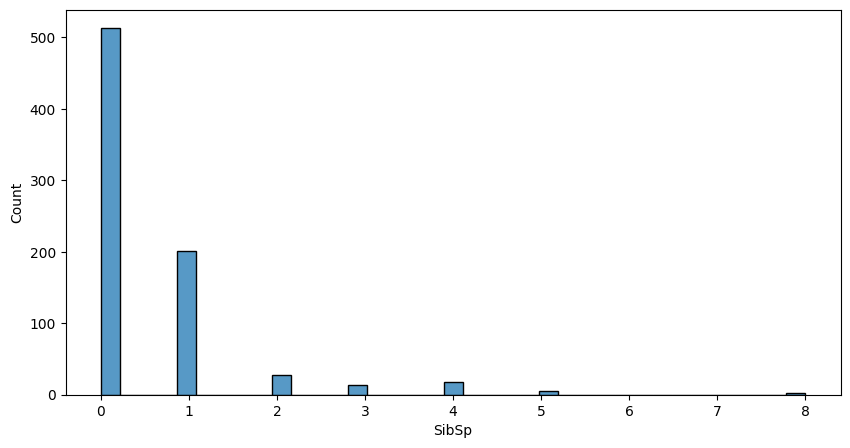

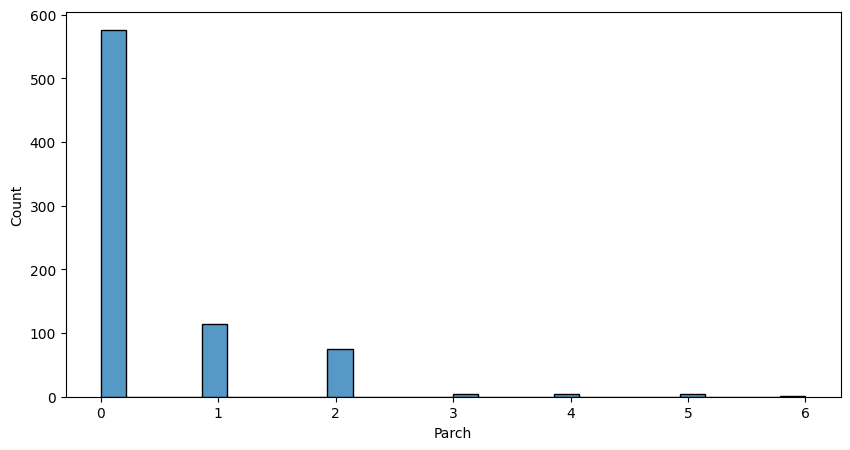

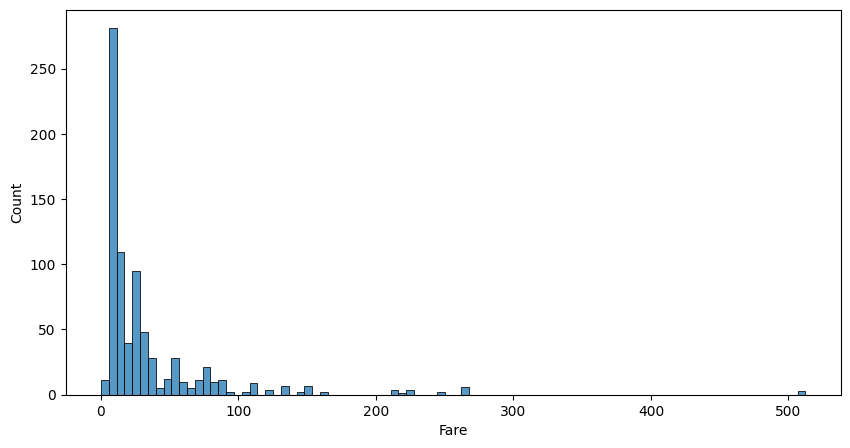

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col])
    plt.show()

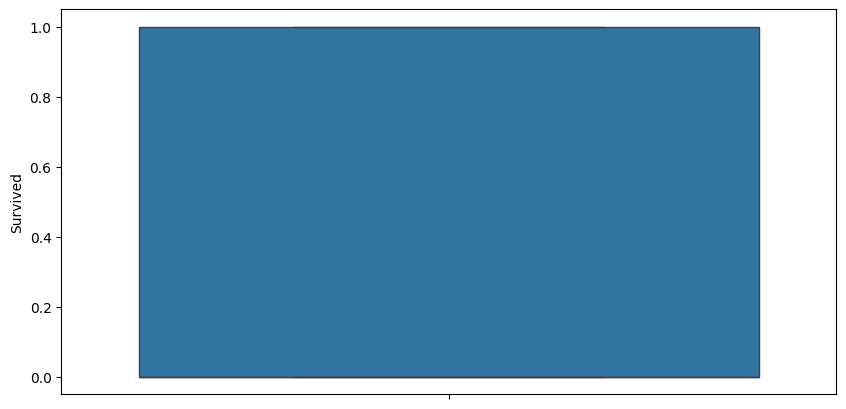

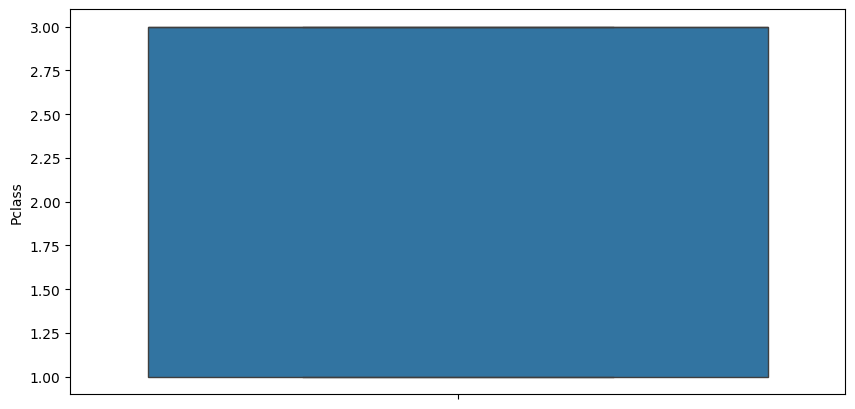

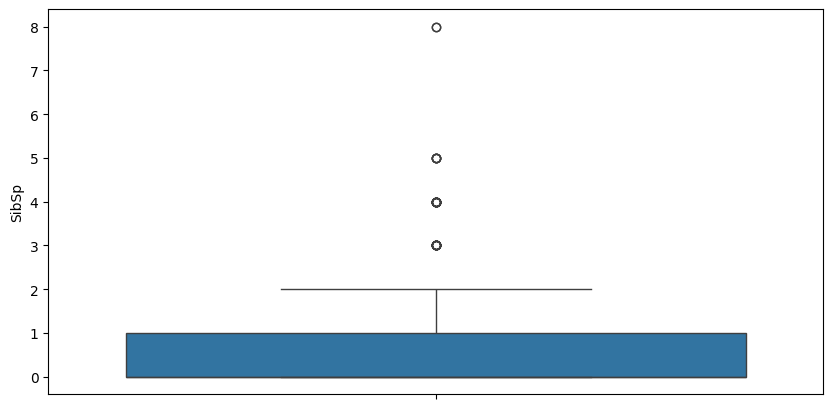

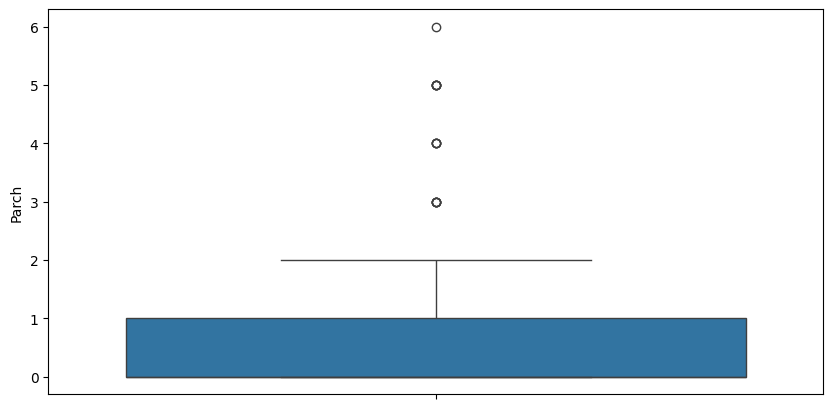

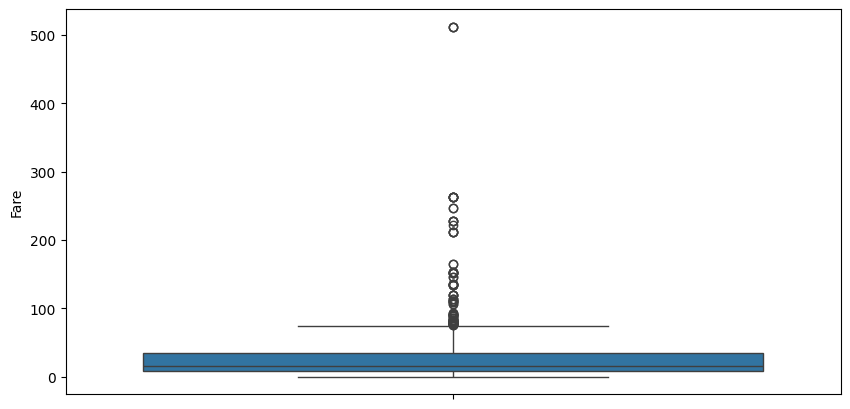

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col])
    plt.show()

<Axes: xlabel='Survived', ylabel='count'>

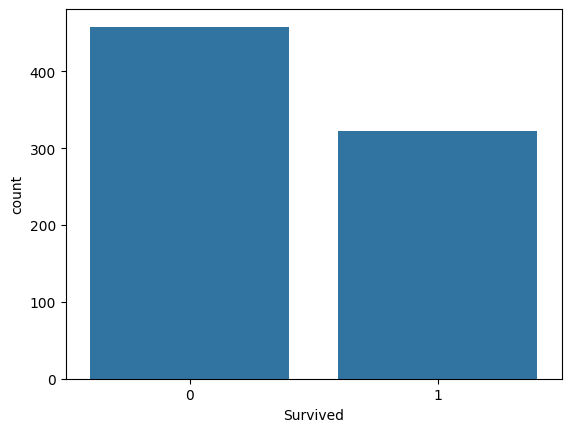

In [ ]:
sns.countplot(x=df['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

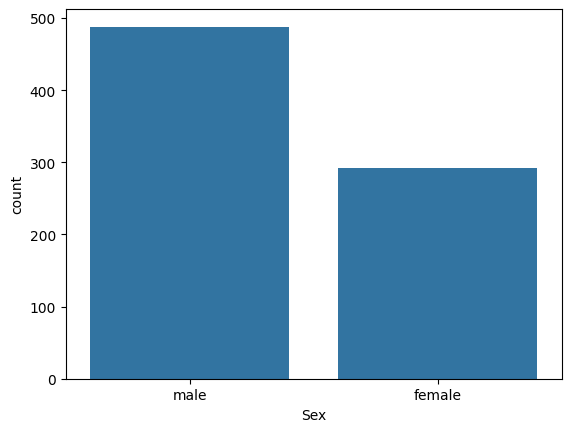

In [ ]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

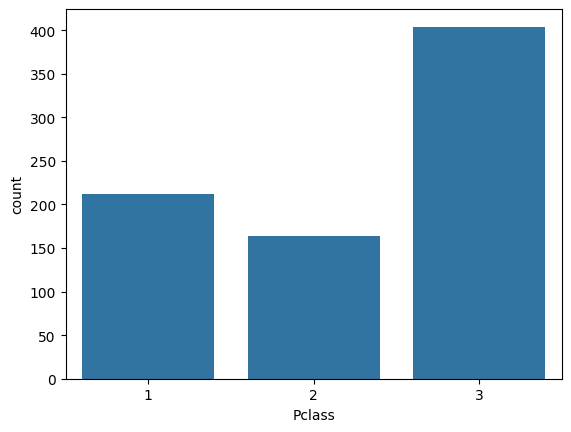

In [ ]:
sns.countplot(x=df['Pclass'])


<Axes: xlabel='Embarked', ylabel='count'>

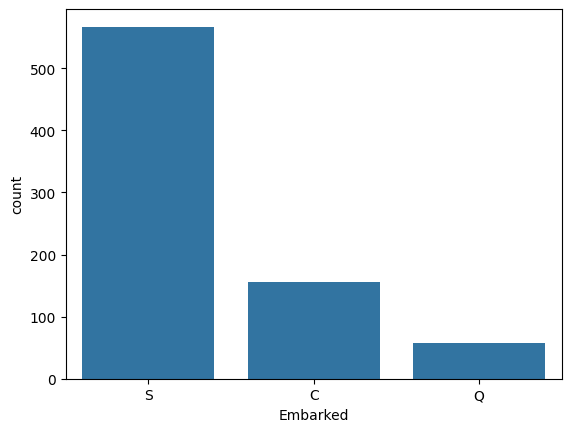

In [ ]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='SibSp', ylabel='count'>

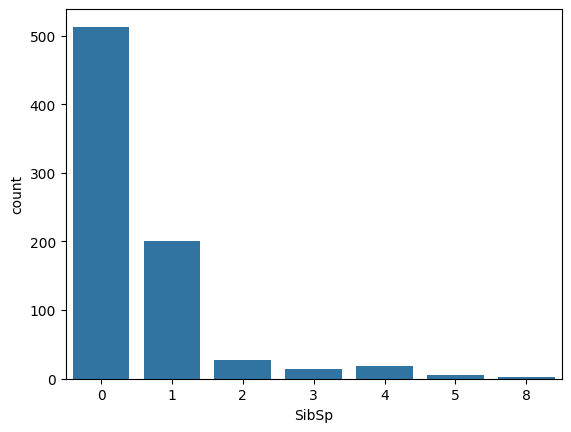

In [ ]:
sns.countplot(x=df['SibSp'])

<Axes: >

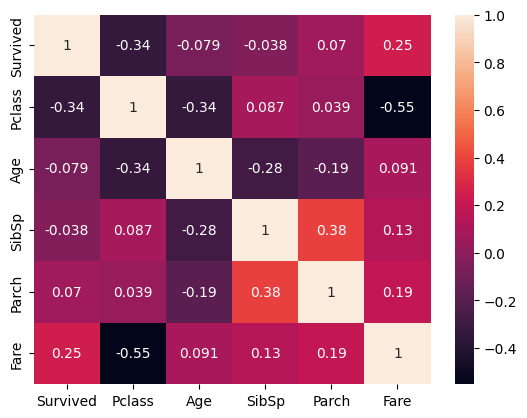

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])


In [ ]:
df=pd.get_dummies(df,columns=['Embarked','Pclass'])

In [ ]:
df=df.astype('int64')

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22,1,0,7,0,0,1,0,0,1
1,1,0,38,1,0,71,1,0,0,1,0,0
2,1,0,26,0,0,7,0,0,1,0,0,1
3,1,0,35,1,0,53,0,0,1,1,0,0
4,0,1,35,0,0,8,0,0,1,0,0,1


In [ ]:
scale=StandardScaler()
df['Age']=scale.fit_transform(df[['Age']])
df['Fare']=scale.fit_transform(df[['Fare']])

In [ ]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,-0.560680,1,0,-0.524709,0,0,1,0,0,1
1,1,0,0.606313,1,0,0.700373,1,0,0,1,0,0
2,1,0,-0.268932,0,0,-0.524709,0,0,1,0,0,1
3,1,0,0.387501,1,0,0.355819,0,0,1,1,0,0
4,0,1,0.387501,0,0,-0.505568,0,0,1,0,0,1


In [ ]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Parameter grid (search space)
param_dist = {
    'max_depth': [None, 3, 5, 7, 10, 15, 20],          # tree ki depth
    'min_samples_split': [2, 5, 10, 15, 20],           # split hone ke liye minimum samples
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],           # leaf node pe min samples
    'max_features': [None, 'sqrt', 'log2']             # feature selection
}

# Base model
dt = DecisionTreeClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,                # 20 random combinations try karega
    cv=5,                     # 5-fold cross validation
    scoring='accuracy',       # accuracy ke basis pe best model choose hoga
    random_state=42,
    n_jobs=-1                 # parallel processing
)

# Fit on training data
random_search.fit(x_train, y_train)

# Best parameters aur score
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Best model se prediction
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Best CV Accuracy: 0.7884387096774195
Test Accuracy: 0.782051282051282
Confusion Matrix:
 [[79 12]
 [22 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        91
           1       0.78      0.66      0.72        65

    accuracy                           0.78       156
   macro avg       0.78      0.76      0.77       156
weighted avg       0.78      0.78      0.78       156



In [ ]:
model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=20,
    min_samples_leaf=2,
    max_features=None,
    random_state=42)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.782051282051282
Confusion Matrix:
 [[79 12]
 [22 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        91
           1       0.78      0.66      0.72        65

    accuracy                           0.78       156
   macro avg       0.78      0.76      0.77       156
weighted avg       0.78      0.78      0.78       156

